In [17]:
%matplotlib inline  

import glob
import os
import re

import matplotlib.pyplot as plt
import pandas as pd
import pretty_midi

import config

In [18]:
# total number of files
print('total number of files')
len(glob.glob(config.dir_glob_midi, recursive=True))

total number of files


1150

In [19]:
def pretty_print_dict(input_dict):
    for key, value in input_dict.items():
        print(f'{key} : {value}')

def midifile_iter():
    for filepath in glob.glob(midi_dir, recursive=True):
        yield filepath

def midifile_basename_iter():    
    for filepath in midifile_iter():
        filename = os.path.basename(filepath).replace('.mid','')
        yield filename
        
def pretty_mid_iter():
    for filepath in midifile_iter():
        pm = pretty_midi.PrettyMIDI(filepath)
        yield pm

### genre counts

In [20]:
no_genres = [
    'fill',
    'fast',
    'beat',
    'slow',
    'mediumfast',
    'soft'
]

dict_genre_count= dict()
unique_genre = set()
for filename in midifile_basename_iter():    
    genres = re.findall('[A-Za-z]+', filename)    
    
    for genre in genres:
        if genre not in no_genres:
            dict_genre_count[genre] = dict_genre_count.get(genre,0) + 1    

print(f'Genre counts')
pretty_print_dict(dict_genre_count)

print(f'Total number of genres : {len(dict_genre_count.keys())}')

Genre counts
soul : 63
groove : 40
funk : 232
hiphop : 95
pop : 27
rock : 361
neworleans : 53
secondline : 3
dance : 7
disco : 5
jazz : 101
latin : 99
brazilian : 57
baiao : 32
afrocuban : 60
reggae : 20
halftime : 37
purdieshuffle : 30
samba : 24
shuffle : 9
reggaeton : 1
breakbeat : 2
country : 29
prog : 3
bembe : 30
gospel : 19
rhumba : 19
chacarera : 3
punk : 58
march : 3
folk : 1
afrobeat : 13
bomba : 1
calypso : 2
swing : 11
rockabilly : 1
linear : 2
klezmer : 1
blues : 4
merengue : 3
sambareggae : 3
songo : 5
middleeastern : 1
bossa : 2
maracatu : 2
venezuelan : 3
dominican : 1
joropo : 1
ando : 1
ijexa : 3
sangueo : 1
frevo : 1
chacha : 1
motown : 16
fusion : 11
indie : 10
bounce : 2
highlife : 2
Total number of genres : 58


### Midifile information

In [21]:
# time signiture count
dict_TS_counts = dict()

for pm in pretty_mid_iter():
    numerator = pm.time_signature_changes[0].numerator
    denominator = pm.time_signature_changes[0].denominator
    
    time_signiture = str(numerator) + '/' + str(denominator)    
    dict_TS_counts[time_signiture] = dict_TS_counts.get(time_signiture,0)+1

pretty_print_dict(dict_TS_counts)

4/4 : 1138
5/4 : 1
3/4 : 5
5/8 : 1
6/8 : 5


<AxesSubplot:>

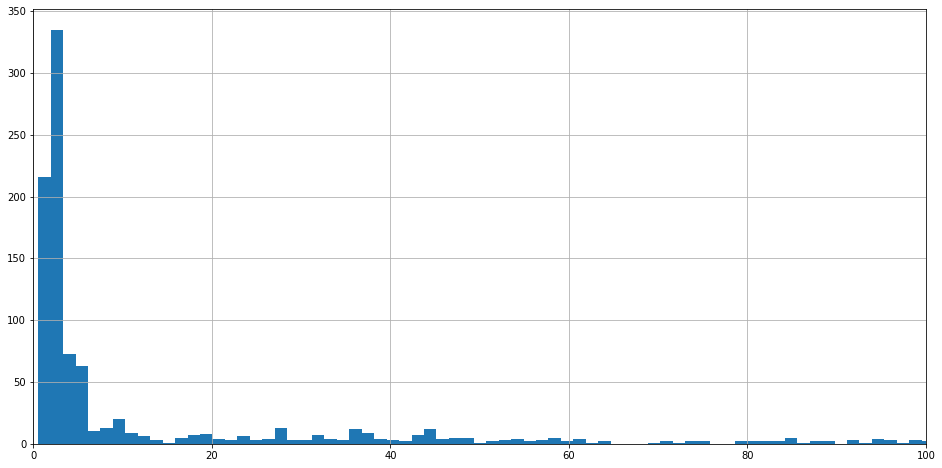

In [22]:
# play time 
list_end_time = []
for pm in pretty_mid_iter():
    
    list_end_time.append(pm.get_end_time() - pm.get_onsets()[0])

Series_end_time = pd.Series(list_end_time)

plt.figure(figsize = (16,8))
plt.xlim([0, 100])
Series_end_time.hist(bins=1000)